* Autora: Isabel Afán de Ribera
* Fecha: 01/02/2021
* Institución: CUNEF

# TAREA FINAL: Datos de vivienda

<p> El negocio inmobiliario es uno de los motores de la economía de España, el carácter turístico de nuesta península hace que sean muchos los inversores extranjeros que se decidan por buscar una inversión de bajo riesgos en nuestras ciudades costeras o grandes urbes. 
Muchas de estas inversiones se hacen sobre grandes bolsas de inmuebles que deben ser analizados previamente para comprobar la rentabilidad del porfolio </p>

<!-- <p> En este caso vamos a trabajar con una tabla que contienen información de distintos inmuebles repartidos por una zona específica, sus carácterísticas y su precio </p>  -->

Todas las cuestiones se deben realizar sobre el conjunto de casos que representen viviendas ubicadas en zonas residenciales **(alta, media y baja densidad)**

**MUY IMPORTANTE:** En las otras prácticas he detectado colaboraciones involucrando varias personas y he sido flexible aunque a algunos os lo he mencionado en las correcciones, porque al final el trabajo de analista de datos es un trabajo colaborativo. Sin embargo, este trabajo es individual, así que cuidado con las colaboraciones.

Las variables de las que se compone el dataset son:

|NOMBRE VARIABLE|DESCRIPTOR|VALORES|
| --- | --- | --- |
|Order|Variable de identificación|1 a 2930|
|MS Zoning|Zona de ubicación de la vivienda|"A rural, C comercial, FV residencial flotante, I industrial, RH residencial alta densidad, RL residencial baja densidad, RM residencial media densidad"|
|Lot Frontage|Longitud de la fachada en pies||
|Lot Area|Superficie de la vivienda en pies cuadrados||
|Land Contour|Contorno del terreno circundante|"Lvl llano, Bnk Tipo bancal, HLS Ladera, Low Depresión"|
|Land Slope|Tipo de pendiente de la vivienda|" Gtl pendiente suave, Mod pendiente moderada, Sev fuerte pendiente"|
|Overall Qual|Grado de calidad de materiales y acabado de la vivienda|De 1 (Muy pobre) a 10 (Excelente)|
|Year Built|Año de construccion de la vivienda||
|Year Remod/Add|Año de última reforma de la vivienda||
|Mas Vnr Type|Tipo de revestimiento exterior|" BrkCmn Ladrillo normal, BrkFace Ladrillo visto, CBlock Bloque de cemento, None Ninguna, Stone Piedra "|
|Exter Qual|Calidad de revestimiento exterior|"Ex Excelente,Gd Bueno,TA Media,Fa Justo"|
|Bsmt Cond|Estado general del sótano|"Ex Excelente, Gd Bueno, TA Media, Fa Justo, Po Pobre,Ss sin sótano"|
|Total Bsmt SF|Superficie del sótano en pies cuadrados|
|Heating QC|Calidad de la calefacción|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|Central Air|Aire acondicionado centralizado|"N No Y Sí"|
|Full Bath|Número de baños completo en planta||
|Half Bath|Número de aseos en planta||
|Bedroom AbvGr|Número de dormitorios en planta||
|Kitchen AbvGr|Número de cocinas en planta||
|Kitchen Qual|Calidad de cocinas|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre"|
|TotRms AbvGrd|Número total de habitaciones excluidos los cuartos de baño||
|Garage Cars|Número de plazas de garaje||
|Garage Area|Superficie del garaje|||
|Garage Cond|Estado del garaje|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Po Pobre,Sg sin garaje"|
|Pool Area|Superficie de la piscina en pies cuadrados|
|Pool QC|Calidad de la piscina|"Ex Excelente,Gd Bueno,TA Media,Fa Justo,Sp no hay piscina"|
|Mo Sold|mes de venta||
|Yr Sold|año de venta||
|SalePrice|precio de venta en dólares||

Recomiendo al leer los datos, eliminar espacios de los nombres de las columnas, realiza un pequeño análisis inicial de los mismos. No olvides fijarte en los tipos de variables, que variables pueden tener tipos confundidos y corrige los. Sobre todo, trabaja con las fechas.

**NOTA:** Las tareas complementarias sirven para subir nota. El resto de preguntas valen igual y suman 10 puntos.

## Inicializar y cargar el contexto spark

In [1]:
# Carga de la libreria y el contexto spark para tener acceso al cluster
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

In [2]:
# cargamos la sesion spark
from pyspark.sql.session import SparkSession
spark = SparkSession(sc)

In [3]:
# Carga del dataset
data_file = "./BDpracticafinalCSV.csv"
raw_data_vivienda = sc.textFile(data_file)

In [4]:
# Comprobación del número de registros del dataset
raw_data_vivienda.count()

2937

In [5]:
# Vemos la estructura de los datos
raw_data_vivienda.take(5)

['Order;MS Zoning;Lot Frontage;Lot Area;Land Contour;Land Slope;Overall Qual;Year Built;Year Remod/Add;Mas Vnr Type;Exter Qual;Bsmt Cond;Total Bsmt SF;Heating QC;Central Air;Full Bath;Half Bath;Bedroom AbvGr;Kitchen AbvGr;Kitchen Qual;TotRms AbvGrd;Garage Cars;Garage Area;Garage Cond;Pool Area;Pool QC;Mo Sold;Yr Sold;SalePrice',
 '1;RL;141;31770;Lvl;Gtl;6;1960;1960;Stone;TA;Gd;1080;Fa;Y;1;0;3;1;TA;7;2;528;TA;0;Sp;5;2010;215000',
 '2;RH;80;11622;Lvl;Gtl;5;1961;1961;None;TA;TA;882;TA;Y;1;0;2;1;TA;5;1;730;TA;0;Sp;6;2010;105000',
 '3;RL;81;14267;Lvl;Gtl;6;1958;1958;BrkFace;TA;TA;1329;TA;Y;1;1;3;1;Gd;6;1;312;TA;0;Sp;6;2010;172000',
 '4;RL;93;11160;Lvl;Gtl;7;1968;1968;None;Gd;TA;2110;Ex;Y;2;1;3;1;Ex;8;2;522;TA;0;Sp;4;2010;244000']

In [6]:
# Al hacer el take hemos comprobado que el dataset contiene cabecera
# Creamos objeto header para poder quitarlo en el parseado
header_vivienda = raw_data_vivienda.take(1)[0]
header_vivienda

'Order;MS Zoning;Lot Frontage;Lot Area;Land Contour;Land Slope;Overall Qual;Year Built;Year Remod/Add;Mas Vnr Type;Exter Qual;Bsmt Cond;Total Bsmt SF;Heating QC;Central Air;Full Bath;Half Bath;Bedroom AbvGr;Kitchen AbvGr;Kitchen Qual;TotRms AbvGrd;Garage Cars;Garage Area;Garage Cond;Pool Area;Pool QC;Mo Sold;Yr Sold;SalePrice'

In [7]:
# Parseamos los datos:
# 1. Filtro para coger todos los datos excepto el header
# 2. Separamos los datos por punto y coma
parsed_data_vivienda = raw_data_vivienda.filter(lambda s: s != header_vivienda) \
                                  .map(lambda x: x.split(";"))
parsed_data_vivienda.take(2)

[['1',
  'RL',
  '141',
  '31770',
  'Lvl',
  'Gtl',
  '6',
  '1960',
  '1960',
  'Stone',
  'TA',
  'Gd',
  '1080',
  'Fa',
  'Y',
  '1',
  '0',
  '3',
  '1',
  'TA',
  '7',
  '2',
  '528',
  'TA',
  '0',
  'Sp',
  '5',
  '2010',
  '215000'],
 ['2',
  'RH',
  '80',
  '11622',
  'Lvl',
  'Gtl',
  '5',
  '1961',
  '1961',
  'None',
  'TA',
  'TA',
  '882',
  'TA',
  'Y',
  '1',
  '0',
  '2',
  '1',
  'TA',
  '5',
  '1',
  '730',
  'TA',
  '0',
  'Sp',
  '6',
  '2010',
  '105000']]

Como solo vamos a trabajar solo con las viviendas ubicadas en zonas residenciales (alta, media y baja densidad) vamos a filtrar el dataset.

In [8]:
# hago un distinct para saber cuantos valores distintos contiene la variable MS Zoning
parsed_data_vivienda.map(lambda x: x[1]).distinct().collect()

['RL', 'C', 'Rl', 'RH', 'rL', 'I', 'A', 'RM', 'FV']

In [10]:
# viendo que el valor residencial baja densidad se repite 3 veces con nombres distintos vamos a renombrar mediante una función,
# donde cambiamos el nombre de las necesarias y el resto las dejamos igual
def renombrar(x):
  if x == 'RL':
    return 'RL'
  elif x == 'C':
    return 'C'
  elif x == 'Rl':
    return 'RL'
  elif x == 'RH':
    return 'RH'
  elif x == 'rL':
    return 'RL'
  elif x == 'I':
    return 'I'
  elif x == 'A':
    return 'A'
  elif x == 'RM':
    return 'RM'
  elif x == 'FV':
    return 'FV'
  else:
    'none'

In [11]:
# Creo un nuevo RDD incluyendo todas las variables y renombrando con la función creada la variable MS Zoning
data_vivienda_filtrar = parsed_data_vivienda.map(lambda x: (x[0], renombrar(x[1]), x[2], x[3], x[4], x[5], x[6], x[7], x[8], x[9], x[10], x[11], x[12], x[13], 
                                            x[14], x[15], x[16], x[17], x[18], x[19], x[20], x[21], x[22], x[23], x[24], x[25], x[26], x[27], x[28]))

In [12]:
# Ahora ya puedo filtrar para que me devuelva un nuevo RDD con todas los valores de MS Zoning que no sean C, I, A, FV
data_vivienda = data_vivienda_filtrar.filter(lambda x: not 'C'  in x[1])\
                                 .filter(lambda x: not 'I' in x[1])\
                                 .filter(lambda x: not 'A' in x[1])\
                                 .filter(lambda x: not 'FV' in x[1])

In [13]:
# compruebo el resultado
data_vivienda.take(3)

[('1',
  'RL',
  '141',
  '31770',
  'Lvl',
  'Gtl',
  '6',
  '1960',
  '1960',
  'Stone',
  'TA',
  'Gd',
  '1080',
  'Fa',
  'Y',
  '1',
  '0',
  '3',
  '1',
  'TA',
  '7',
  '2',
  '528',
  'TA',
  '0',
  'Sp',
  '5',
  '2010',
  '215000'),
 ('2',
  'RH',
  '80',
  '11622',
  'Lvl',
  'Gtl',
  '5',
  '1961',
  '1961',
  'None',
  'TA',
  'TA',
  '882',
  'TA',
  'Y',
  '1',
  '0',
  '2',
  '1',
  'TA',
  '5',
  '1',
  '730',
  'TA',
  '0',
  'Sp',
  '6',
  '2010',
  '105000'),
 ('3',
  'RL',
  '81',
  '14267',
  'Lvl',
  'Gtl',
  '6',
  '1958',
  '1958',
  'BrkFace',
  'TA',
  'TA',
  '1329',
  'TA',
  'Y',
  '1',
  '1',
  '3',
  '1',
  'Gd',
  '6',
  '1',
  '312',
  'TA',
  '0',
  'Sp',
  '6',
  '2010',
  '172000')]

## Cuántas viviendas distintas encontramos en el dataset? ¿Se repite alguna? Tiene sentido que haya duplicadas? ¿Qué podemos hacer con las duplicadas?

Para conocer cuantas viviendas distintas contiene el dataset empleamos la función distinct que nos devolverá los valores distintos, en este caso de la variable Order (posición cero) relativa a la identificación de las viviendas.

In [14]:
# Aplicamos función distinct y count para tener un recuento de valores distintos
viviendas = data_vivienda.map(lambda x: x[0]).distinct()
print("El dataset deuda contiene {} viviendas distintas.".format(viviendas.count()))

El dataset deuda contiene 2762 viviendas distintas.


In [15]:
# También hago un recuento del dataset completo
data_vivienda.count()

2768

Se han obtenido 2762 viviendas distintas, mientras que en el recuento de registros totales se obtienen 2768, por tanto, hay 6 viviendas repetidas. El hecho de que haya registros repetidos no tiene sentido en este caso pues cada casa debe tener su información recogida una sola vez, no tiene sentido que haya datos distintos sobre la misma vivienda. Esto podría ser un problema de Data Quality pues habría varias fuentes de entrada del mismo registro. Por lo tanto, conviene detectar los registros duplicados y deshacernos de ellos.

In [16]:
# función para detectar duplicados de la columna 0 relativa al codigo identificativo de cada vivienda
def duplicate(x):
    return "{0}".format(x[0])

In [17]:
duplicados = data_vivienda.map(lambda x: (duplicate(x), x))
# aqui me deshago de los duplicados
duplicados2 = duplicados.reduceByKey(lambda x,y: (x))

In [18]:
# creamos nuevo RDD sin valores duplicados con el que vamos a trabajar
data_vivienda = duplicados2.map(lambda x: x[1])

In [19]:
# comprobamos que hemos quitado los 6 duplicados
data_vivienda.count()

2762

## ¿Podrías decirme el total de inmuebles y el precio medio (Sale Price) de cada zona (MS Zoning)?

Aquí se nos pide por cada zona de ubicación de la vivienda (MS Zoning) el recuento de viviendas y el precio medio de venta.

En primer lugar creo un RDD con los datos de zona como clave y los de total inmuebles como valor y hago un recuento de inmuebles según zona.

In [20]:
total = data_vivienda.map(lambda x: (x[1], x[0]))

# reduceByKey para agregar valores por la misma clave, valor inicial con count a 1, me da recuento por vivienda
recuento = total.map(lambda x: (x[0],1)).reduceByKey(lambda x,y: x + y)
recuento.collect()

[('RL', 2273), ('RH', 27), ('RM', 462)]

A continuación creo otro RDD con los datos de zonas como clave y precio medio asociado como valor.

In [21]:
precio_vivienda = data_vivienda.map(lambda x: (x[1], (float(x[28]), 1)))

Posteriormente, agrupo los valores del precio por zona que es la key.

In [22]:
# sumatorio por zonas
grupos_zonas = precio_vivienda.reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1]))

Por último, calculo el precio medio por zona y uno la información tanto de total de inmuebles como de precio medio por zona. De esta manera obtengo el precio medio de venta y el total de inmuebles de cada zona residencial. En este caso parece que el precio medio más elevado es de la zona residencial de baja densidad donde también se vende el mayor número de residencias.

In [23]:
# persist guarda en memoria
precio_medio = grupos_zonas.map(lambda x: (x[0], x[1][0]/x[1][1])).join(recuento).persist()
precio_medio.collect()

[('RL', (191283.25164980203, 2273)),
 ('RH', (136419.77777777778, 27)),
 ('RM', (126781.39393939394, 462))]

## Media de Total Bsmt SF por cada década de construcción calculada a partir de Year Built. 
## ¿Cuál es la decada de construcción con viviendas mejor acondicionadas para el frío (Heating QC)?

En este apartado se nos pide calcular la media de la variable 'Superficie del sótano en pies cuadrados' (Total Bsmt SF ) por decada de contrucción tomando como referencia el año de construcción (Year Built). Posteriormente se nos pide evaluar cuál es la decada con viviendas mejor aconcionadas para el frío (variable Heating QC) relativa a calidad de la calefacción.

Primero, creo una función para pasar los años a decadas.

In [24]:
# como voy a aplicarla en la variable Year Built establezco que coja del elemento 0 al 3 de dicha variable que se corresponde
# con los tres primeros numeros del año y que le añada 0's para cambiarlos a decadas
def decades(x):
    return x[0:3] + "0's"

A continuación nuevo RDD con las variables año de construcción como clave aplicandole la función decades y superficie del sótano como valor pasándolo a float para poder operar, pues por defecto el RDD está en formato string.

In [25]:
# Year Built variable 7
# Total Bsmt SF variable 12
decadas = data_vivienda.map(lambda x: (decades(x[7]), (float(x[12]))))

In [26]:
# nos aseguramos de que la función se ha aplicado correctamente mediante un take
decadas.take(5)

[("1990's", 1468.0),
 ("2000's", 1114.0),
 ("1970's", 876.0),
 ("1960's", 1051.0),
 ("1910's", 972.0)]

Ahora creo RDD con clave decada y valor superficie, agrupo por clave sumando y calculo la media de superficie. Se ha comprobado que la decada en la que se construyeron casas con mayor superficie de sótano fue en 2010's y la de menor superficie la de 1940's.

In [27]:
s_dec = decadas.map(lambda x: (x[0],x[1])).reduceByKey(lambda x,y: x + y)

In [28]:
# reduceByKey para agregar valores por la misma clave, valor inicial con count a 1
super_decadas = decadas.map(lambda x: (x[0],1)).reduceByKey(lambda x,y: x + y)

In [29]:
# divido para obtener la media
super_media = s_dec.join(super_decadas).map(lambda x:(x[0],(x[1][0]/x[1][1])))
super_media.collect()

[("1890's", 885.5833333333334),
 ("1970's", 952.7225274725274),
 ("1930's", 769.9158878504672),
 ("1910's", 788.3009708737864),
 ("2010's", 1539.0),
 ("1880's", 836.0),
 ("1940's", 706.9261744966443),
 ("1920's", 833.9368421052632),
 ("1870's", 761.0),
 ("1960's", 1082.672268907563),
 ("1980's", 1086.0),
 ("1950's", 968.2955223880597),
 ("1900's", 720.1388888888889),
 ("1990's", 1138.8083067092653),
 ("2000's", 1348.469079939668)]

Para la cuestión relativa a decada de construcción con viviendas mejor acondicionadas para el frío se han realizado los siguientes pasos:

* 1) Se ha comprobado los distintos valores de la variable Heating QC relativa a la calidad de la calefacción de las viviendas.
* 2) Se ha creado un RDD con la variable Year Built convertida en decadas y la variable categórica Heating QC.
* 3) Como se nos pide viviendas mejor acondicionadas para el frío hemos filtrado todas aquellas que reunan la caracteristica Excelente.
* 4) Por último, para conocer la decada concreta mejor acondicionada, se ha realizado un recuento de la categoria calidad de acondicionamiento excelente según decada.

In [30]:
# distinct de la variable Heating QC para saber que valores incluye, las mejores acondicionadas serán las excelentes (Ex)
data_vivienda.map(lambda x: x[13]).distinct().collect()

['Fa', 'Po', 'TA', 'Gd', 'Ex']

In [31]:
# Year Built variable 7
# Heating QC variable 13
heating = data_vivienda.map(lambda x: (decades(x[7]), ((x[13]))))
heating.take(3)

[("1990's", 'Ex'), ("2000's", 'Ex'), ("1970's", 'TA')]

In [32]:
# filtramos la categoria excelente de Heating QC
excelentes = heating.filter(lambda x: "Ex" in x[1])
excelentes.take(3)

[("1990's", 'Ex'), ("2000's", 'Ex'), ("1900's", 'Ex')]

La década mejor acondicionada para el frío es la de los 2000.

In [33]:
# countByKey para ver la frecuencia en variables categoricas
recuento_heating = excelentes.countByKey()
recuento_heating

defaultdict(int,
            {"1880's": 2,
             "1890's": 4,
             "1900's": 12,
             "1910's": 38,
             "1920's": 51,
             "1930's": 40,
             "1940's": 56,
             "1950's": 98,
             "1960's": 88,
             "1970's": 68,
             "1980's": 28,
             "1990's": 233,
             "2000's": 638,
             "2010's": 2})

## ¿Cuáles son las 10 viviendas que se vendieron por un precio más elevado por metro cuadrado en el año 2009?

Para conocer las 10 viviendas vendidas a mayor precio por metro cuadrado en 2009 vamos a emplear la variable Order pues nos da la identificación de las viviendas, la variable Lot Area relativa a la superficie de las viviendas en pies cuadrados, la variable Sale Price sobre precio de venta en dólares y la variable Yr Sold relativa al año de venta (pues estamos hablando de precio en el momento de venta no de construcción ni de reforma).  

Primero filtro mi RDD original sin duplicados por el año 2009 de la variable Yr Sold pues solo nos interesan estos datos en este caso.

In [34]:
year09 = data_vivienda.filter(lambda x: "2009" in x[27])

A continuación:
* 1) Creo un RDD con identificación del inmueble, año de venta y precio por metro cuadrado (la variable Lot Area realativa a superficie viene dado en pies cudrados, tenemos que pasarlo a metros cuadrados, 1 pie cuadrado = 0.092903 metros cuadrados)
* 2) Ordenado de forma descendente para tener las viviendas más caras las primeras
* 3) Obtengo los 10 primeros registros que coincidirán con las 10 viviendas vendidas a mayor precio por metro cuadrado en 2009.

In [35]:
# Order variable en posición 0
# Yr Sold variable en posición 27
# Sale Price variable en posición 28
# Lot Area variable en posición 3
viviendas_caras = year09.map(lambda x: (x[0], x[27], float(x[28])/(float(x[3])*0.092903))) \
            .sortBy(lambda x: x[2], ascending = False) \
            .takeOrdered(10, lambda x: len(x))

viviendas_caras

[('936', '2009', 1026.7118971897073),
 ('934', '2009', 991.0325013521444),
 ('464', '2009', 821.0570122815511),
 ('935', '2009', 807.9613655043873),
 ('408', '2009', 765.647528938273),
 ('407', '2009', 756.0368904997173),
 ('405', '2009', 717.5943367454944),
 ('933', '2009', 714.281725843034),
 ('403', '2009', 711.1872444531239),
 ('411', '2009', 701.0707829388548)]

## Media anual por zonas del precio de venta y metros cuadrados.

Se quiere conocer la media del precio de venta y de la superficie de la vivienda en metros cuadrados según zona residencial y año. Por tanto, vamos a utilizar las variables MS Zoning referida a la zona de ubicación de la vivienda, Yr Sold del año de venta (si hablamos de precio de venta se considera que debe escogerse este año y no el de construcción), Lot Area para la superficie de la vivienda y Sale Price para precio de venta.  

Se crea RDD con las variables mencionadas, siendo necesario pasar el precio a tipo float al igual que la superficie y pasarla a metros cuadrados.

In [36]:
# MS Zoning en posición 1
# Yr Sold variable en posición 27
# Sale Price variable en posición 28
# Lot Area variable en posición 3 
precio_metros_zonas = data_vivienda.map(lambda x: (x[1], x[27], (float(x[3])*0.092903), (float(x[28]))))

* Zona RH residencial alta densidad

In [37]:
# filtro por la zona RH
zona_RH = precio_metros_zonas.filter(lambda x: "RH" in x[0])
zona_RH.take(3)

[('RH', '2006', 826.8367, 107000.0),
 ('RH', '2006', 657.939046, 160000.0),
 ('RH', '2009', 615.853987, 103600.0)]

In [38]:
# RDD para media anual de SUPERFICIE de la zona RH
rdd_RH = zona_RH.map(lambda x: (x[1], x[2]))

In [39]:
# agrupación y recuento
superf_H = rdd_RH.map(lambda x: (x[0],x[1])).reduceByKey(lambda x,y: x + y)
superf_RH = rdd_RH.map(lambda x: (x[0],1)).reduceByKey(lambda x,y: x + y)

In [40]:
# superficie media
sm_RH = superf_H.join(superf_RH).map(lambda x:(x[0],(x[1][0]/x[1][1])))
sm_RH.collect()

[('2007', 651.31970725),
 ('2010', 753.0345568),
 ('2008', 766.1400733333334),
 ('2006', 659.5648484999999),
 ('2009', 647.1437174)]

In [41]:
# RDD para calculo de PRECIO medio por año
rdd2_RH = zona_RH.map(lambda x: (x[1], x[3]))

In [42]:
# agrupación y recuento
precio_H = rdd2_RH.map(lambda x: (x[0],x[1])).reduceByKey(lambda x,y: x + y)
precio_RH = rdd2_RH.map(lambda x: (x[0],1)).reduceByKey(lambda x,y: x + y)

In [43]:
# precio medio
pm_RH = precio_H.join(precio_RH).map(lambda x:(x[0],(x[1][0]/x[1][1])))
pm_RH.collect()

[('2007', 147250.0),
 ('2010', 126280.0),
 ('2008', 150333.33333333334),
 ('2006', 140316.66666666666),
 ('2009', 116206.8)]

* Zona RM residencial media densidad

In [44]:
# filtro por la zona RM
zona_RM = precio_metros_zonas.filter(lambda x: "RM" in x[0])
zona_RM.take(3)

[('RM', '2009', 957.5512209999999, 103500.0),
 ('RM', '2007', 791.53356, 136000.0),
 ('RM', '2008', 557.418, 129400.0)]

In [45]:
# RDD para media anual de SUPERFICIE de la zona RM
rdd_RM = zona_RM.map(lambda x: (x[1], x[2]))

In [46]:
# agrupación y recuento
superf_M = rdd_RM.map(lambda x: (x[0],x[1])).reduceByKey(lambda x,y: x + y)
superf_RM = rdd_RM.map(lambda x: (x[0],1)).reduceByKey(lambda x,y: x + y)

In [47]:
# superficie media
sm_RM = superf_M.join(superf_RM).map(lambda x:(x[0],(x[1][0]/x[1][1])))
sm_RM.collect()

[('2007', 625.4484220842105),
 ('2010', 586.1042039137931),
 ('2008', 623.6691686341463),
 ('2009', 552.5560763333335),
 ('2006', 575.0140103627451)]

In [48]:
# RDD para calculo de PRECIO medio por año
rdd2_RM = zona_RM.map(lambda x: (x[1], x[3]))

In [49]:
# agrupación y recuento
precio_M = rdd2_RM.map(lambda x: (x[0],x[1])).reduceByKey(lambda x,y: x + y)
precio_RM = rdd2_RM.map(lambda x: (x[0],1)).reduceByKey(lambda x,y: x + y)

In [50]:
# precio medio
pm_RM = precio_M.join(precio_RM).map(lambda x:(x[0],(x[1][0]/x[1][1])))
pm_RM.collect()

[('2007', 128947.62105263158),
 ('2010', 119681.70689655172),
 ('2008', 133336.1219512195),
 ('2009', 118759.86904761905),
 ('2006', 127502.63725490196)]

* Zona RL residencial baja densidad

In [51]:
# filtro por la zona RL
zona_RL = precio_metros_zonas.filter(lambda x: "RL" in x[0])
zona_RL.take(3)

[('RL', '2008', 871.615946, 191000.0),
 ('RL', '2008', 1272.306585, 155000.0),
 ('RL', '2010', 694.91444, 127000.0)]

In [52]:
# RDD para media anual de SUPERFICIE de la zona RM
rdd_RL = zona_RL.map(lambda x: (x[1], x[2]))

In [53]:
# agrupación y recuento
superf_L = rdd_RL.map(lambda x: (x[0],x[1])).reduceByKey(lambda x,y: x + y)
superf_RL = rdd_RL.map(lambda x: (x[0],1)).reduceByKey(lambda x,y: x + y)

In [54]:
# superficie media
sm_RL = superf_L.join(superf_RL).map(lambda x:(x[0],(x[1][0]/x[1][1])))
sm_RL.collect()

[('2007', 1059.6779461064984),
 ('2010', 1011.359316660079),
 ('2008', 1047.6533375414847),
 ('2006', 1043.7936291211502),
 ('2009', 1002.1840689904027)]

In [55]:
# RDD para calculo de PRECIO medio por año
rdd2_RL = zona_RL.map(lambda x: (x[1], x[3]))

In [56]:
# agrupación y recuento
precio_L = rdd2_RL.map(lambda x: (x[0],x[1])).reduceByKey(lambda x,y: x + y)
precio_RL = rdd2_RL.map(lambda x: (x[0],1)).reduceByKey(lambda x,y: x + y)

In [57]:
# precio medio
pm_RL = precio_L.join(precio_RL).map(lambda x:(x[0],(x[1][0]/x[1][1])))
pm_RL.collect()

[('2007', 193399.98014440434),
 ('2010', 184978.418972332),
 ('2008', 189885.58515283844),
 ('2006', 194350.64065708418),
 ('2009', 190455.55086372362)]

Estos resultados podrían servirnos para estudiar las diferencias de superficie media y precio medio de venta entre las distintas zonas residenciales. Con respecto a la superficie media se puede apreciar que la zona residencial de baja densidad es la que mayor superficie por metro cuadrado tiene con diferencia siendo el máximo en 2007 con 1059.67 m2. El máximo de la zona de alta densidad es de 766.14 m2 en 2008 y de la zona de media densidad de 625.44 en 2007. 

En lo relativo al precio medio de venta ocurre los mismo siendo las viviendas de la zona de baja densidad las más caras, precio medio de venta máximo en 2006 con 194350.64 dólares. Mientras las de media densidad en 2008 con 133336.12 dólares y las de alta densidad 150333.3 dólares en 2008.

Estos resultados tienen sentido pues las viviendas situadas en zonas de baja densidad suelen ser casas con mucho espacio abierto y alejadas de grandes aglomeraciones, por tanto, son viviendas con mayor superficie y mayor precio generalmente.

## ¿Podrías decirme el total de recaudación de las casas de revistimiento (Mas Vnr Type) de piedra con respecto a las de ladrillo? ¿Hay diferencia significativa?

In [58]:
# distinct para conocer los distintos valores de la variable Mas Vnr Type
data_vivienda.map(lambda x: x[9]).distinct().collect()

['', 'None', 'CBlock', 'Stone', 'BrkFace', 'BrkCmn']

In [59]:
# RDD -Mas Vnr Type posición 9 y SalePrice posición 28-
rdd_revest = data_vivienda.map(lambda x: (x[9], float(x[28])))
# filtro para quedarme solo con revestimiento de piedra y ladrillo 
revestimiento = rdd_revest.filter(lambda x: not 'None' in x[0]) \
                    .filter(lambda x: not 'CBlock' in x[0]) 
revestimiento.take(5)

[('BrkFace', 191000.0),
 ('BrkFace', 180000.0),
 ('Stone', 227680.0),
 ('BrkFace', 129250.0),
 ('BrkFace', 142000.0)]

Aquí tenemos el total de recaudación de las casas de revestimiento de piedra (Stone), de ladrillo visto (BrkFace) y de ladrillo normal (BrkCmn). Podemos ver una diferencia significativa entre los tres tipos debido principalmente a que hay mucha diferencia entre el número de casas hechas con un material u otro. Las viviendas hechas con ladrillo visto son 848, las de piedra 229 y las de ladrillo normal 25, ello explica las diferencia de recaudación entre los tipos de revestimiento.

In [60]:
# recuento de cada tipo de revestimiento para poder comparar
revestimiento.countByKey()

defaultdict(int, {'': 16, 'BrkCmn': 25, 'BrkFace': 848, 'Stone': 229})

In [61]:
# sumatorio agrupando por tipo de revestimiento
recaudacion = revestimiento.map(lambda x: (x[0], x[1])).reduceByKey(lambda x,y: x+y)
recaudacion.collect()

[('', 3831658.0),
 ('Stone', 60175477.0),
 ('BrkFace', 178912561.0),
 ('BrkCmn', 3504975.0)]

## ¿Cuánto son más caras las viviendas con 2 cocinas, con 2 o más plazas de garaje que las que tienen 1 cocina y 1 plaza de garaje? Comparar medias y cuartiles de ambos casos

In [62]:
# para calcular las medias
import statistics as stats 

In [63]:
# Kitchen AbvGr -  Número de cocinas en planta 18
# Garage Cars -  Número de plazas de garaje 21
# SalePrice 28 - Precio de venta 28
cocina_garaje = data_vivienda.map(lambda x: (x[18], x[21], x[28]))

Primero vamos a trabajar con las viviendas con 2 cocinas y con 2 o más plazas de garaje.

In [64]:
# valores distintos de la variable  Kitchen AbvGr
data_vivienda.map(lambda x: x[18]).distinct().collect()

['1', '3', '2']

In [65]:
# valores distintos de la variable Garage Cars
data_vivienda.map(lambda x: x[21]).distinct().collect()

['', '4', '1', '0', '5', '3', '2']

In [66]:
# filtramos las viviendas con 2 cocinas y 2 o más plazas de garaje
casas_2 = cocina_garaje.filter(lambda x: '2' in x[0]) \
                     .filter(lambda x: not '0' in x[1]) \
                     .filter(lambda x: not '1' in x[1])

In [67]:
casas_2.take(2)

[('2', '2', '103500'), ('2', '2', '142953')]

In [68]:
# precio medio
precio_casas2 = casas_2.map(lambda x: float(x[2])).mean()
precio_casas2

145124.27906976748

In [69]:
# collect para que me devuelva una lista de los precios de las casas con 2 cocinas y 2 o más plazas de garaje y lo ordeno 
# para poder sacar los cuartiles
cuartiles_casas2 = casas_2.map(lambda x: x[2])
list_precio_casas2 = cuartiles_casas2.collect()
list_precio_casas2.sort()

In [70]:
# 25% - primer cuartil
# de la lista de precios el 25%, pasar el precio a entero
list_precio_casas2[int(len(list_precio_casas2)*.25)]

'128600'

In [71]:
# 50% - segundo cuartil
# de la lista de precios el 50%
list_precio_casas2[int(len(list_precio_casas2)*.50)]

'145000'

In [72]:
# 75% - tercer cuartil
# de la lista de precios el  75%
list_precio_casas2[int(len(list_precio_casas2)*.75)]

'190000'

Ahora trabajamos con las viviendas de 1 cocina y 1 plaza de garaje.

In [73]:
# 1 cocina y 1 plaza de garaje
casas_1 = cocina_garaje.filter(lambda x: '1' in x[0]) \
                     .filter(lambda x: '1' in x[1])

In [74]:
# precio medio
precio_casas1 = casas_1.map(lambda x: float(x[2])).mean()
precio_casas1

128121.99337748346

In [75]:
cuartiles_casas1 = casas_1.map(lambda x: x[2])
list_precio_casas1 = cuartiles_casas1.collect()
list_precio_casas1.sort()

In [76]:
# 25% - primer cuartil
list_precio_casas1[int(len(list_precio_casas1)*.25)]

'120000'

In [77]:
# 50% - segundo cuartil
list_precio_casas1[int(len(list_precio_casas1)*.50)]

'135000'

In [78]:
# 75% - tercer cuartil
list_precio_casas1[int(len(list_precio_casas1)*.75)]

'157000'

In [79]:
# diferencia del precio medio entre las con 2 cocinas, con 2 o más plazas de garaje y las casas con 1 cocina y 1 plaza de garaje
precio_casas2 - precio_casas1

17002.285692284015

El precio medio de venta es más elevado en el caso de las viviendas con 2 cocinas, con 2 o más plazas de garaje. En concreto 17002.28 dólares más caras que las casas con 1 cocina y 1 plaza de garaje. Si comparamos por cuartiles ocurre lo mismo, las primeras son más caras en todos los casos.

## (COMPLEMENTARIA) Estudiar la relación entre el precio y el número de Garajes. (Recomiendo segmentar precio por cuartiles y estudiar el número de casos coincidentes)

In [80]:
# importamos libreria pyspark.sql y el contexto sql
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [81]:
# cargamos los datos como DataFrame
df = spark.read.csv("BDpracticafinalCSV.csv", header=True, sep=";")
df.show(2)

+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+
|Order|MS Zoning|Lot Frontage|Lot Area|Land Contour|Land Slope|Overall Qual|Year Built|Year Remod/Add|Mas Vnr Type|Exter Qual|Bsmt Cond|Total Bsmt SF|Heating QC|Central Air|Full Bath|Half Bath|Bedroom AbvGr|Kitchen AbvGr|Kitchen Qual|TotRms AbvGrd|Garage Cars|Garage Area|Garage Cond|Pool Area|Pool QC|Mo Sold|Yr Sold|SalePrice|
+-----+---------+------------+--------+------------+----------+------------+----------+--------------+------------+----------+---------+-------------+----------+-----------+---------+---------+-------------+-------------+------------+-------------+-----------+-----------+-----------+---------+-------+-------+-------+---------+
|    1|      

In [82]:
# creamos nuevo DataFrame con las dos variables objeto de estudio
df_gp = df.select(["Garage Cars", "SalePrice"])
df_gp.show()

+-----------+---------+
|Garage Cars|SalePrice|
+-----------+---------+
|          2|   215000|
|          1|   105000|
|          1|   172000|
|          2|   244000|
|          2|   189900|
|          2|   195500|
|          2|   213500|
|          2|   191500|
|          2|   236500|
|          2|   189000|
|          2|   175900|
|          2|   185000|
|          2|   180400|
|          2|   171500|
|          2|   212000|
|          3|   538000|
|          2|   164000|
|          3|   394432|
|          2|   141000|
|          2|   210000|
+-----------+---------+
only showing top 20 rows



In [83]:
# ahora pasamos el DF de Spark a DF de Pandas
import pandas as pd
df_gp = df_gp.toPandas()

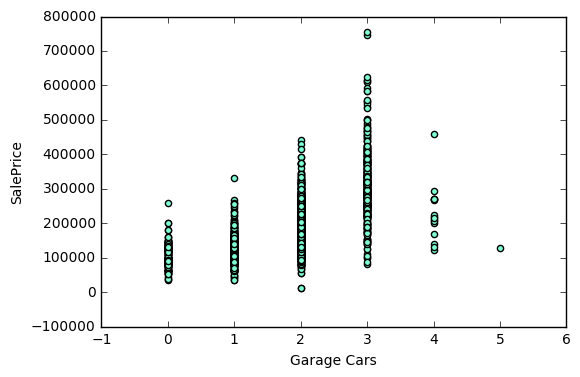

In [85]:
# representamos la relación entre el número de plazas de garaje y el precio mediante un gráfico de dispersión
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df_gp['Garage Cars'], df_gp.SalePrice, c = 'aquamarine')
plt.xlabel('Garage Cars')
plt.ylabel('SalePrice');

Parece que hay muchos casos en los que el precio coincide con independencia de que el número de plazas aumente (intervalo entre 120-450 mil dólares). Pero también se puede ver que en los casos de viviendas con 2 o 3 plazas de garaje si que aumenta el precio en algunos casos, especialmente en viviendas con 3 garajes. Solo hay una vivienda con 5 plazas de garaje, a pesar de ser la que más plazas tiene su precio es bastante inferior a muchas otras viviendas con menos plazas, está por debajo de los 200 mil dólares habiendo otras con menos plazas mucho más caras.

## (COMPLEMENTARIA) Las 10 viviendas con mejores servicios y mejor precio.

### Pista:
#### Calcula las variables: 
- Número de servicios excelentes
- Número de servicios buenos
...

#### Tendréis que tener en cuenta también variables como número de baños Full Bath, cocinas Kitchen AbvGr o dormitorios Bedroom AbvGr. Generando por ejemplo (número de estas variables por encima de media)

#### Finalmente precio de venta

In [87]:
# Finalización contexto spark
sc.stop()